# Credit Card Fraud Detection – Model Evaluation

# Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    classification_report
)

import joblib


# Step 2: Load Test Data and Trained Model

In [2]:
X_test = pd.read_csv("../data/preprocessed/X_test_fe.csv")
y_test = pd.read_csv("../data/preprocessed/y_test.csv").values.ravel()

model = joblib.load("../models/fraud_model.pkl")

print("Test data shape:", X_test.shape)


Test data shape: (56746, 35)


# Step 3: Generate Prediction Probabilities

In [3]:
y_proba = model.predict_proba(X_test)[:, 1]

In [4]:
y_proba

array([0.00225266, 0.00598321, 0.02299449, ..., 0.00188364, 0.01103295,
       0.00373313])

# Step 4: ROC-AUC Score (Primary Metric)

In [5]:
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.976326891614307


# Step 5: ROC Curve Visualization

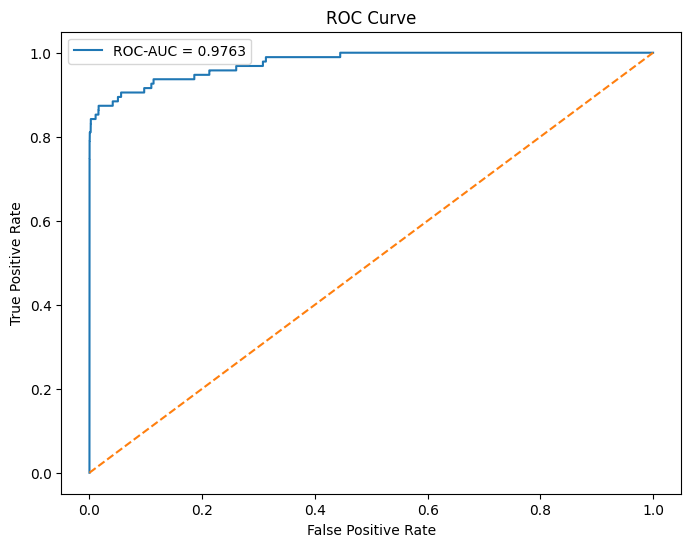

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Step 6: Precision–Recall Curve (Fraud-Critical)

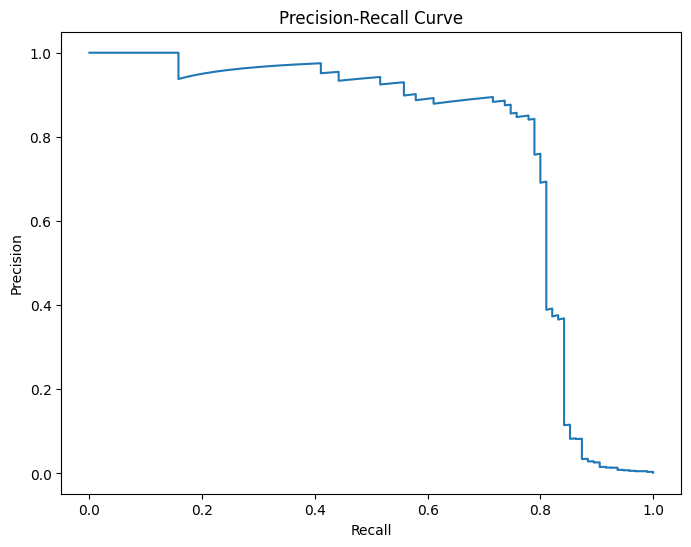

In [7]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


# Step 7: Threshold Selection

In [8]:
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

In [9]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Step 8: Confusion Matrix

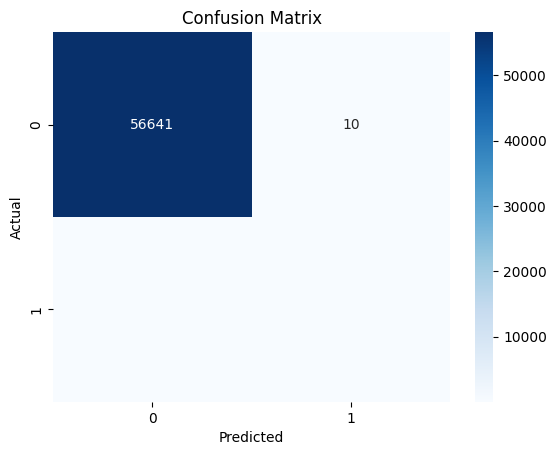

In [10]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Classification Report

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.75      0.81        95

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



# Step 10: Business Interpretation

In [12]:
print("""
Evaluation Insights:
- ROC-AUC indicates strong fraud separation
- High recall ensures fraud detection
- False positives must be controlled to protect customer experience
- Threshold can be tuned based on business tolerance
""")



Evaluation Insights:
- ROC-AUC indicates strong fraud separation
- High recall ensures fraud detection
- False positives must be controlled to protect customer experience
- Threshold can be tuned based on business tolerance



# Final Summary